In [1]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [2]:
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sleep = open('/home/amn34/metis/stuff/noirs/austen.txt').read()

In [5]:
sleep = sleep.decode('utf-8', 'ignore')

In [6]:
sleep = sleep.lower()

In [7]:
tokenizer = RegexpTokenizer(r'\w+')

In [8]:
sleepwordsorig = tokenizer.tokenize(sleep)

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

In [10]:
sleepstop = [w for w in sleepwordsorig if not w in stop]

In [11]:
print len(sleepstop)

55345


In [11]:
sent = pd.read_pickle('sentiment.pkl')

In [13]:
#sent.fillna(0, inplace=True)

In [14]:
#sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

In [15]:
#sent['word'] = sent['word'].values.astype('unicode')

In [16]:
#sent.to_pickle('sentiment.pkl')

In [12]:
sleepwords = pd.DataFrame(columns=['word'])

In [13]:
sleepwords.word = sleepstop

In [14]:
sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

In [15]:
sleepsentiment.head()

,word,emotion,sentiment
0,family,NaN,NaN
1,dashwood,NaN,NaN
2,long,anticipation,-1.0
3,settled,NaN,NaN
4,sussex,NaN,NaN


In [16]:
import numpy as np

In [17]:
sleepsentiment.fillna(0,inplace=True)

In [18]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [19]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append(sum(i.sentiment))

In [20]:
len(pagesent)

369

<Container object of 369 artists>

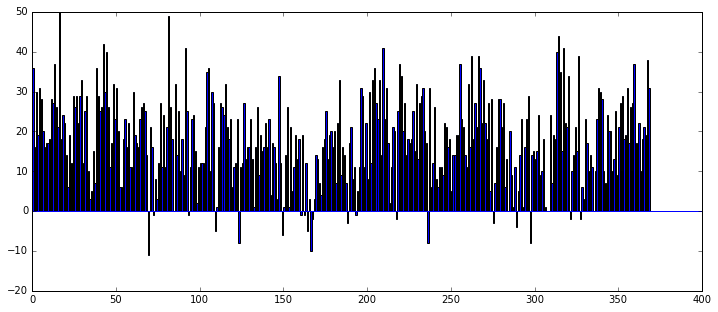

In [21]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pagesent)),pagesent)

In [22]:
words = word_tokenize(sleep)

In [23]:
sentences = sent_tokenize(sleep)

In [24]:
print len(sentences), len(words), len(words)/float(len(sentences))

4942 144493 29.2377579927


In [25]:
ss = sleepsentiment.sentiment.values

In [26]:
sentcount = 0

In [27]:
for i in ss:
    if i !=0: 
        sentcount +=1

In [28]:
sentcount

19708

In [29]:
19708/144493.0

0.13639415058168908

In [30]:
from collections import Counter

In [31]:
Counter(ss)

Counter({-1.0: 6563, 0.0: 35637, 1.0: 13145})

In [32]:
pospage = []
negpage = []

for i in chunker(sleepsentiment,150):
    postemp = 0
    negtemp = 0
    for j in i.sentiment.values:
        if j == 1.0:
            postemp += 1
        elif j == -1.0:
            negtemp -= 1
    pospage.append(postemp)
    negpage.append(negtemp)

In [33]:
len(pospage)

369

<Container object of 369 artists>

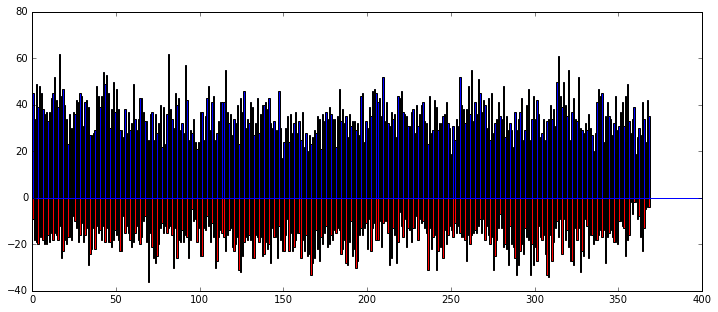

In [34]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pospage)),pospage)
plt.bar(range(len(negpage)), negpage, color='r')

In [35]:
pagesent = map(int,pagesent)

In [36]:
len(pagesent)

369

In [37]:
import scipy.fftpack

In [38]:
x = range(len(pagesent))

In [39]:
y = np.asarray(pagesent)

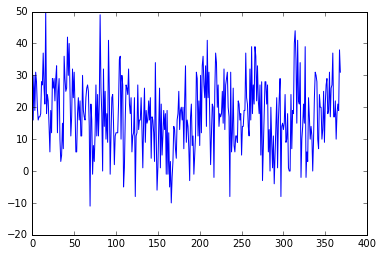

In [40]:
plt.plot(x,y)

In [62]:
cN = len(pagesent)
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(pagesent)

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/155)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

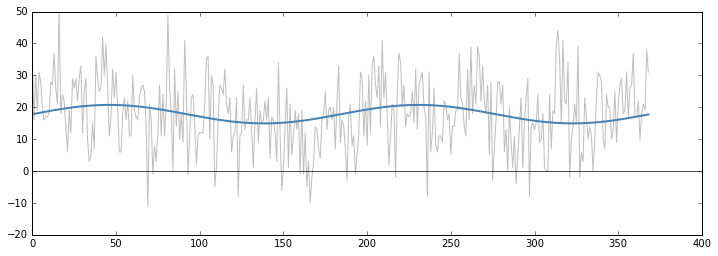

In [63]:
fig = plt.figure(figsize=(12,4))
plt.plot(x, y, alpha=0.5, color='grey')
plt.plot(x,cy2, color='steelblue', linewidth=2)
plt.axhline(y=0, color='black', alpha=0.7)


In [55]:
woman = [u'she',u'her',u'girl']
womancount = []
for i in chunker(sleepwordsorig,250):
    womantmp = 0
    for word in i:
        if word in woman:
            womantmp+=1
    womancount.append(womantmp)

<Container object of 495 artists>

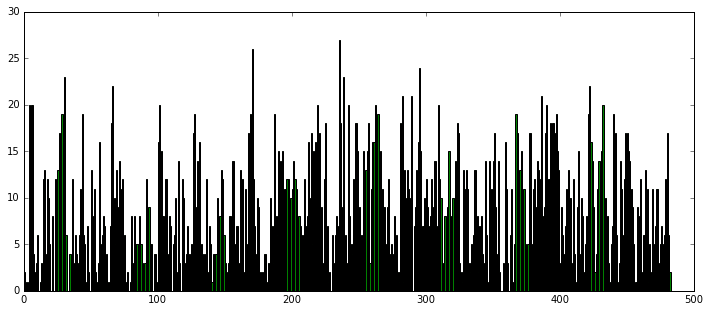

In [45]:
plt.figure(figsize=(12,5))
plt.bar(range(len(womancount)),womancount,color='g')

In [46]:
guncount = []
gun = ['gun','guns']
for i in chunker(sleepwordsorig,250):
    guntmp = 0
    for word in i:
        if word in gun:
            guntmp+=1
    guncount.append(guntmp)

<Container object of 495 artists>

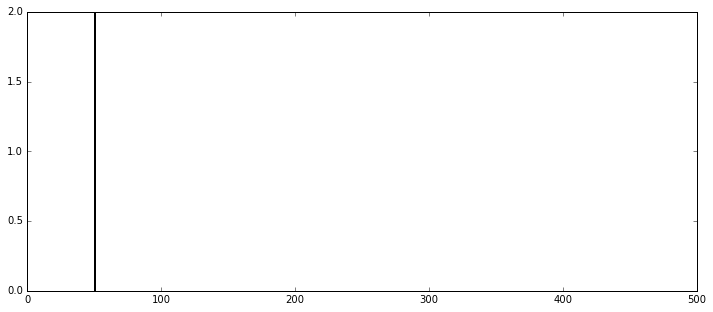

In [47]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(guncount)),guncount)